In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

import glob
convFiles=glob.glob("convProfs/*nc")
print(convFiles)

ntot=0
zKuL=[]
zKaL=[]
pRateDPRL=[]
pRateCMBL=[]
dmCMBL=[]
nodes2L=[]
bsfcL=[]
piaKuL=[]
piaDPRL=[]
bcfL=[]
n1,n2=4,5
ns=66
for f in convFiles[:]:
    with nc.Dataset(f) as fh:
        hzero=fh['hzero'][:,n1:n2,4]
        zKu=fh['zKu'][:,n1:n2,4]
        zKa=fh['zKa'][:,n1:n2,4]
        bzd=fh['bzd'][:,4,4]
        bcf=fh['bcf'][:,4,4]
        bsfc=fh['elevation'][:,4,4]
        elev=fh['elevation'][:,4,4]
        PIAhyb=fh['PIAhyb'][:,n1:n2,4]
        PIAhybDPR=fh['PIAhybDPR'][:,n1:n2,4]
        bsfc[bsfc<0]=0
        bsfc=(175-(bsfc/125))
        
        precipDPR=fh['precip'][:,n1:n2,4,:]
        precipCMB=fh['precipCMB'][:,n1:n2,4,:]  
        dmCMB=fh['dmCMB'][:,n1:n2,4] 
        n24=30
        a=np.nonzero(bcf-bzd>n24)
        for i in a[0]:            
            nodes=list(range(bzd[i]-ns,bzd[i]+n24))
            if nodes[0]%2==0:
                nodes2=nodes[::2]
            else:
                nodes2=nodes[1::2]
            nodes2=np.array(nodes2)//2         
            if precipCMB[i,:,nodes2[-1]].min()>-0.1:
                zKuL.append(zKu[i,:,bzd[i]-ns:bzd[i]+n24])
                zKaL.append(zKa[i,:,bzd[i]-ns:bzd[i]+n24])
                pRateDPRL.append(precipDPR[i,:,bzd[i]-ns:bzd[i]+n24])
                pRateCMBL.append(precipCMB[i,:,:][:,nodes2])
                dmCMBL.append(dmCMB[i,:,:][:,nodes2])
                piaKuL.append(PIAhyb[i,:])
                piaDPRL.append(PIAhybDPR[i,:,:])
                bsfcL.append(bsfc[i])
                bcfL.append(bcf[i])
                nodes2L.append(nodes2)
                ntot+=1
print(ntot)
pRateCMBL=np.array(pRateCMBL)
print(pRateCMBL.shape)
print(precipCMB.shape)
print(precipCMB[i,:,:][:,nodes2].shape)

['convProfs/convProfs_20200701-02.nc', 'convProfs/convProfs_20200201-05.nc', 'convProfs/convProfs_20200601-02.nc', 'convProfs/convProfs_20200301-05.nc', 'convProfs/convProfs_20200401-02.nc', 'convProfs/convProfs_20200101-05.nc', 'convProfs/convProfs_20200501-02.nc', 'convProfs/convProfs_20200501-05.nc', 'convProfs/convProfs_20200401-05.nc', 'convProfs/convProfs_20200101-02.nc', 'convProfs/convProfs_20200601-05.nc', 'convProfs/convProfs_20200301-02.nc', 'convProfs/convProfs_20200701-05.nc', 'convProfs/convProfs_20200201-02.nc']
59089
(59089, 1, 48)
(6387, 1, 88)
(1, 48)


0.55
299.97
59089
(59089, 1, 96)


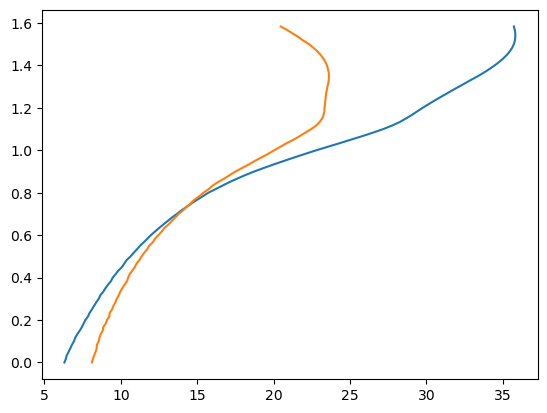

In [2]:
pRateDPRL=np.array(pRateDPRL)
piaKuL=np.array(piaKuL)
pRateDPRL=np.array(pRateDPRL)
print(pRateDPRL[:,:,-1].min())
print(pRateDPRL[:,:,-1].max())
print(len(pRateCMBL))
nt=len(pRateCMBL)
X=np.zeros((nt,ns+n24,3),float)
zKuL=np.array(zKuL)
zKaL=np.array(zKaL)
zKuL[zKuL<0]=0
zKaL[zKaL<0]=0
xrange=(np.arange(ns+n24)-60.0)/60.0+1
print(zKuL.shape)
import matplotlib.pyplot as plt
plt.plot(zKuL.mean(axis=(0,1)),xrange)
plt.plot(zKaL.mean(axis=(0,1)),xrange)
#plt.plot(zKuL[1000,:])
#plt.plot(zKaL[1000,:])
X[:,:,0]=(zKuL/zKuL.std(axis=(0,1)))[:,0,:]
X[:,:,1]=(zKaL/zKuL.std(axis=(0,1)))[:,0,:]
for k in range(nt):
    X[k,:,2]=xrange


In [222]:
pRateDPRL=np.array(pRateDPRL)
print(pRateDPRL.min(),pRateDPRL.max())
y=np.log(1+pRateDPRL)
print(y.min(),y.max(),y.mean(),y.std())
ymean=y.mean(axis=(0,1))
ystd=y.std(axis=(0,1))
y1_scaled=(y[:,0,:]-ymean)/ystd
y1_scaled=y1_scaled[:,:,np.newaxis]
pRateCMBL=np.array(pRateCMBL)
ycmb=np.log(1+pRateCMBL)
ycmb=pRateCMBL
ycmb_mean=ycmb.mean(axis=(0,1))
ycmb_std=ycmb.std(axis=(0,1))
ycmb_scaled=(ycmb[:,0,:]-ycmb_mean)/ycmb_std
ycmb_scaled=ycmb_scaled[:,:,np.newaxis]
dmCMBL=np.array(dmCMBL)
dmCMBL_mean=dmCMBL.mean(axis=(0,1))
dmCMBL_std=dmCMBL.std(axis=(0,1))
dmCMBL_scaled=(dmCMBL[:,0,:]-dmCMBL_mean)/dmCMBL_std
dmCMBL_scaled=dmCMBL_scaled[:,:,np.newaxis]

print(y1_scaled.shape)
print(ycmb_scaled.shape)
print(dmCMBL_scaled.shape)
y_scaled=np.concatenate((y1_scaled[:,::2,:],ycmb_scaled,dmCMBL_scaled),axis=2)

iprofs=np.arange(y_scaled.shape[0])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, i_train, i_test, piaKu_train, piaKu_test, bsfc_train, bsfc_test = train_test_split(X, y_scaled, iprofs, piaKuL, bsfcL, test_size=0.2, random_state=42)


0.0 299.97
0.0 5.7070107 0.9193314 1.1104082
(59089, 96, 1)
(59089, 48, 1)
(59089, 48, 1)


In [223]:
print(len(bsfcL))

59089


In [180]:
from sklearn.cluster import KMeans
print(X_train.shape)
nclust=25
kmeans = KMeans(n_clusters=nclust, random_state=0).fit(X_train[:,-60:,0])

(47271, 96, 3)


In [214]:
classPrecipL=[]
kgainL=[]
ymeanL=[]
xmeanL=[]
weightL=[]
from sklearn.mixture import GaussianMixture

for k in range(nclust):
    a=np.nonzero(kmeans.labels_==k)
    classPrecipL.append(y_train[a[0],-1,1].mean())
    yens1L=X_train[a[0],-50::1,0]
    yens2L=X_train[a[0],-50::1,1]
    piaKuEnsL=np.array([piaKu_train[i] for i in a[0]])
    #print(piaKuEnsL.shape)
    yensL=np.concatenate((yens1L[:,:],yens2L[:,:],piaKuEnsL[:,:]),axis=1)
    xensL=y_train[a[0],-24:,1]
    ngm=1
    gm = GaussianMixture(n_components=ngm,covariance_type='full').fit(xensL[:,-10:-1])
    label=gm.predict(xensL[:,-10:-1])
    print(gm.weights_*yensL.shape[0])
    sfcPrecip_means=gm.means_[:,-1]
    ind=np.argsort(sfcPrecip_means)
    kgaincL=[]
    ymeancL=[]
    xmeancL=[]
    ngm=3
    for ic in range(ngm):
        r=np.random.rand(yensL.shape[0])
        a1=np.nonzero(r<0.6)
        #a1=np.nonzero(label==ic)
        xensLc=xensL[a1[0],:]
        yensLc=yensL[a1[0],:]
        covXY=np.cov(np.log(1+xensLc).T,yensLc.T)
        nx=xensLc.shape[1]
        ny=yensLc.shape[1]
        covYY=covXY[nx:,nx:]+np.eye(ny)*0.1
        covXY=covXY[:nx,nx:]
        kgain=np.dot(covXY,np.linalg.pinv(covYY))
        ymean=yensLc.mean(axis=0)
        kgaincL.append(kgain)
        ymeancL.append(ymean)
        xmeancL.append(np.log(1+xensLc).mean(axis=0))
    #print(len(a[0]))
    kgainL.append(kgaincL)
    ymeanL.append(ymeancL)
    xmeanL.append(xmeancL)
    weightL.append([1./ngm for k in range(ngm)])
classPrecipL=np.array(classPrecipL)

(1961, 1)
[1961.]
(2656, 1)
[2656.]
(2042, 1)
[2042.]
(1805, 1)
[1805.]
(918, 1)
[918.]
(2291, 1)
[2291.]
(2497, 1)
[2497.]
(2247, 1)
[2247.]
(2113, 1)
[2113.]
(3701, 1)
[3701.]
(1208, 1)
[1208.]
(2191, 1)
[2191.]
(2724, 1)
[2724.]
(2489, 1)
[2489.]
(1212, 1)
[1212.]
(1774, 1)
[1774.]
(1359, 1)
[1359.]
(458, 1)
[458.]
(1720, 1)
[1720.]
(1670, 1)
[1670.]
(2922, 1)
[2922.]
(2333, 1)
[2333.]
(1470, 1)
[1470.]
(1242, 1)
[1242.]
(268, 1)
[268.]


In [182]:
#print(ymeanL[0].shape)
#print(np.array(xmeanL)[:,-1])
print(classPrecipL)
print(weightL[0])

[-0.4944998   0.27545324 -0.15223205  1.1012411  -0.6030821  -0.48219472
  0.24462937 -0.44086507  0.85344964  0.7669635  -0.5457095   0.25661635
 -0.21879107 -0.38709444 -0.47525617 -0.5077576  -0.3198249   1.1302875
 -0.55523723  1.035332    0.01829623 -0.4022707  -0.05375418 -0.46426362
 -0.66174954]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [215]:
classTest=kmeans.predict(X_test[:,-60:,0])
precip_pred=classPrecipL[classTest]
precipL=[]
#print(kgainL[0].shape)
#print(ymeanL[0].shape)
#print(xmeanL[0].shape)
for i, classP in enumerate(classTest):
    y1=X_test[i,-50::1,0]
    y2=X_test[i,-50::1,1]
    y3=piaKu_test[i]
    ytot=np.concatenate((y1,y2,y3))

    for ic in range(3):
        precip1=np.exp(np.dot(kgainL[classP][ic],ytot-ymeanL[classP][ic])+xmeanL[classP][ic])-1
        if ic==0:
            precip=precip1*weightL[classP][ic]
        else:
            precip+=precip1*weightL[classP][ic]
    precipL.append(precip[-1])
print(np.corrcoef(precip_pred,y_test[:,-1,1]))
print(np.corrcoef(precipL,y_test[:,-1,1]))

[[1.         0.53309792]
 [0.53309792 1.        ]]
[[1.         0.66113379]
 [0.66113379 1.        ]]


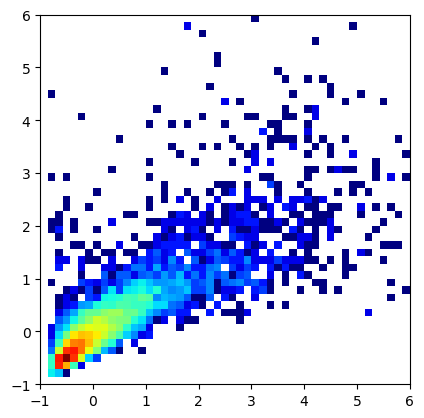

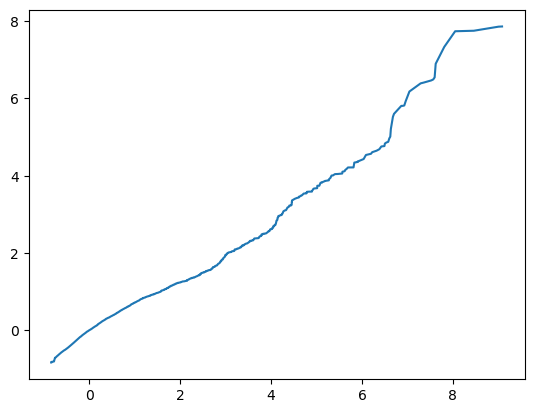

In [221]:
import matplotlib
ax=plt.subplot(111)
h1d=plt.hist2d(y_test[:,-1,1],precipL,cmap='jet',bins=np.linspace(-1,6,50),norm=matplotlib.colors.LogNorm()) 
ax.set_aspect(1.0)
plt.figure()
plt.plot(np.sort(y_test[:,-1,1][:-30]),np.sort(precipL)[:-30])

In [218]:
precip_ref_sort=np.sort(y_test[:,-1,1])
precip_pred_sort=np.sort(precipL)
print(precip_ref_sort.shape)
dist1=precip_ref_sort[::5][:-5]
dist2=precip_pred_sort[::5][:-5]

(11818,)


In [219]:
import importlib
import bisectm
importlib.reload(bisectm)

nd=dist1.shape[0]
precip_dmL=[]
for i, precip1 in enumerate(precipL):
    ind=bisectm.bisectm(dist2,nd,precip1)
    f=(dist2[ind]-precip1)/(dist2[ind]-dist2[ind-1])
    #print(f,precip1,dist2[ind],dist2[ind-1])
    #f=1
    intprecip=f*dist1[ind-1]+(1-f)*dist1[ind]
    precip_dmL.append(intprecip)

[[1.         0.83545913]
 [0.83545913 1.        ]]


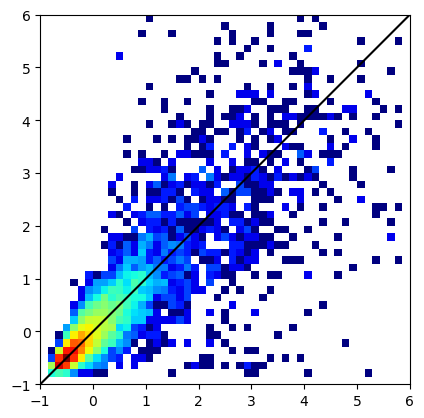

In [220]:
ax=plt.subplot(111)
print(np.corrcoef(precip_dmL,y_test[:,-1,1]))
h1=plt.hist2d(precip_dmL,y_test[:,-1,1],cmap='jet',norm=matplotlib.colors.LogNorm(),bins=np.linspace(-1,6,50))
ax.set_aspect(1.0)
plt.plot([-1,6],[-1,6],'k')

In [245]:
#define a dense neural network with 4 inputs, 16 neurons in the first hidden layer, and 64 outputs
# torch please
import torch
import torch.nn as nn
class denseNet(nn.Module):
    def __init__(self):
        super(denseNet, self).__init__()
        self.fc1 = nn.Linear(3, 16)  
        self.fc2 = nn.Linear(16, 64)  
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x[:,None,:]
    
proj_net=denseNet()

In [240]:
x2_train=np.concatenate((X_train[:,-24:-23,0],X_train[:,-1:,0],(piaKu_train[:,:]-3.8)/4.),axis=1)
x2_test=np.concatenate((X_test[:,-24:-23,0],X_test[:,-1:,0],(piaKu_test[:,:]-3.8)/4.),axis=1)
print(piaKu_train.mean(),piaKu_train.std())
print(x2_test.shape)

3.8804398 3.4148424
(11818, 3)


In [230]:
from neuralop.models import TFNO
import torch
from torch.utils.data import DataLoader, TensorDataset

fno_model = TFNO(n_modes=(16,), hidden_channels=32, projection_channels=16, factorization='tucker', rank=0.42,
             in_channels=3, out_channels=1, dropout=0.1, groups=1)


xtest=torch.tensor(np.random.rand(1,3,64).astype(np.float32))

y=fno_model(xtest,output_shape=(64,))

print(y.shape)

torch.Size([1, 1, 64])


In [241]:
train_dataset = TensorDataset(torch.tensor((X_train.swapaxes(1,2)).astype(np.float32)), torch.tensor(x2_train.astype(np.float32)),torch.tensor((y_train).swapaxes(1,2).astype(np.float32)))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)   

In [246]:
train_dataset.tensors[0].shape
train_dataset.tensors[1].shape
from torch import nn, optim
criterion_mse=nn.MSELoss(reduction='mean')
optimizer = optim.Adam(list(fno_model.parameters())+list(proj_net.parameters()), lr=0.001)
n_epochs = 5
for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    ibatch=0
    for data, x2, target in train_loader:
        optimizer.zero_grad()
        #print(x2.shape)
        yproj=proj_net(x2)
        #print(yproj.shape)
        xfno=torch.cat((data[:,:2,-64:],yproj),axis=1)
        z = fno_model(xfno,output_shape=(32,))    
        #print(z.shape)
        #print(target.shape)
        loss=criterion_mse(z[:,:,:],target[:,1:2,-32:])
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ibatch+=1
    train_loss = train_loss / ibatch
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))


In [207]:
y_pred=fno_model(torch.tensor(X_test.swapaxes(1,2).astype(np.float32))[:,:2,-64:],output_shape=(32,))

[[1.         0.65707595]
 [0.65707595 1.        ]]


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0., 82., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-1.        , -0.85714286, -0.71428571, -0.57142857, -0.42857143,
        -0.28571429, -0.14285714,  0.        ,  0.14285714,  0.28571429,
         0.42857143,  0.57142857,  0.71428571,  0.85714286,  1.        ,
         1.14285714,  1.28571429,  1.42857143,  1.57142857,  1.71428571,
         1.85714286,  2.        ,  2.14285714,  2.28571429,  2.42857143,
         2.57142857,  2.71428571,  2.85714286,  3.        ,  3.14285714,
         3.28571429,  3.42857143,  3.57142857,  3.71428571,  3.85714286,
         4.        ,  4.14285714,  4.28571429,  4.42857143,  4.57142857,
         4.71428571,  4.85714286,  5.        ,  5.14285714,  5.28571429,
         5.42857143,  5.57142857,  5.71428571,  5.85714286

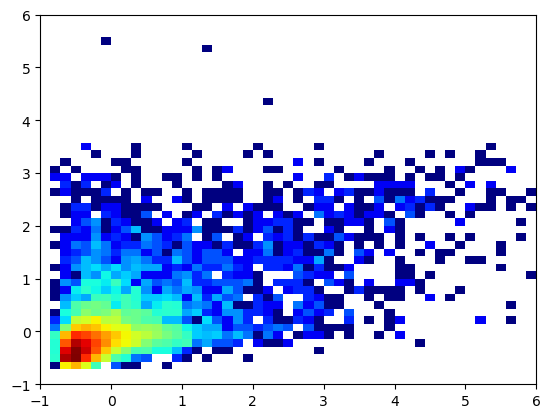

In [209]:
print(np.corrcoef(y_pred.detach().numpy()[:,0,-1],y_test[:,-1,1].flatten()))
plt.hist2d(y_test[:,-1,1].flatten(),y_pred.detach().numpy()[:,0,-1],cmap='jet',bins=np.linspace(-1,6,50),norm=matplotlib.colors.LogNorm())

In [210]:
print(len(piaKuL))

59089
